## Linear Relationship

There is a linear relationship between y and X where y is your dependant variable and X contains your independent variables.

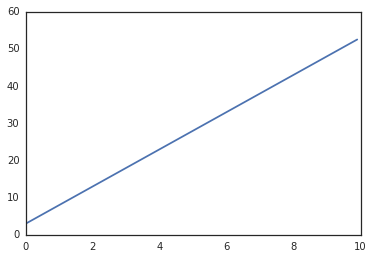

In [102]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# y = 3 + 5x
intercept = 3
slope = 5

def y_line(x, intercept, slope):
    return intercept + (slope * x)

xs = np.arange(0, 10, .1)
ys = [y_line(x, intercept, slope) for x in xs]
plt.plot(xs, ys)

## Error

In reality, our data has error.

Mean zero gaussian with constant variance and i.i.d

This means that are coefficients are estimates as our data has errors (from population). Linear regression is best unbiased linear estimator. Meaning if you relationship is linear regression is best unbiased estimator. Unbiased means the expected value of our estimate equals the actual value. [Bias and variance graphs](http://scott.fortmann-roe.com/docs/BiasVariance.html)


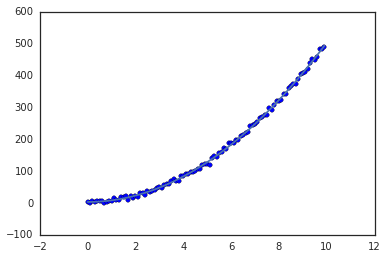

In [100]:
n_data = 100
error_std = 5
ys_error = [y_line(x, intercept, slope) + np.random.normal(0, error_std) for x in xs]
plt.plot(xs, ys)
plt.scatter(xs, ys_error)

## Minimizes RSS

Chooses your coefficients such that RSS is minmized. Change all else constant

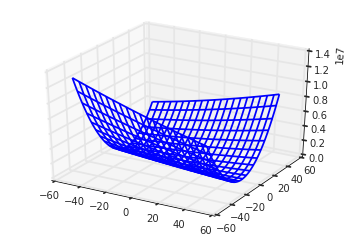

In [95]:
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import axes3d

def sum_squared_error(xs, b0, b1, ys=ys_error):
    return np.sum((ys - np.array([y_line(x, b0, b1) for x in xs]))**2)

def huber_error(xs, b0, b1, ys=ys_error):
    sum_error = 0
    for i in range(len(xs)):
        abs_residual = abs(ys[i] - y_line(xs[i], b0, b1))
        if abs_residual <= 5:
            sum_error += abs_residual**4
        else:
            sum_error += abs_residual
    
    return sum_error

x_grid, y_grid = np.mgrid[-50:50:1, -50:50:1]

z = np.zeros(x_grid.shape)
for row_x in range(x_grid.shape[0]):
    for col_x in range(x_grid.shape[0]):
            z[row_x, col_x] = sum_squared_error(xs, x_grid[row_x, col_x], y_grid[row_x, col_x])
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x_grid, y_grid, z, rstride=5, cstride=5)

In [96]:
np.min(z)

2711.6028696902999

In [97]:
sum_squared_error(xs, intercept, slope)

2728.6330517873835

In [98]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(xs.reshape(-1, 1), ys_error)
ys_pred = clf.predict(xs.reshape(-1, 1))
print ("Coef: {}".format(clf.coef_))
print ("Intercept: {}".format(clf.intercept_))
print ("SSE: {}".format(np.sum((ys_pred - ys_error)**2)))

Coef: [ 4.88806163]
Intercept: 2.96894401758
SSE: 2683.95210506


## Assesing Accuracy

Train, Validation, Test splits -> See homework 1

How know good fit? Compare to other models, prior knowledge, acceptability for error.

Why need these splits?

## Qualitative Variables

If leave as one variable, assumes linear relationship. Can create dummies. Include all in model, but one.

See recitation session 1 on how to create dummy variables in pandas

## Testing Linearity

Residual plots. No discernable pattern.

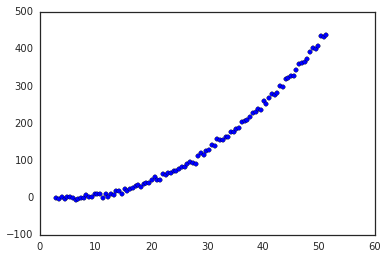

In [101]:
residuals = ys_error - ys_pred
plt.scatter(ys_pred, residuals)

## Outliers

Leverage plot. Box Plots. 

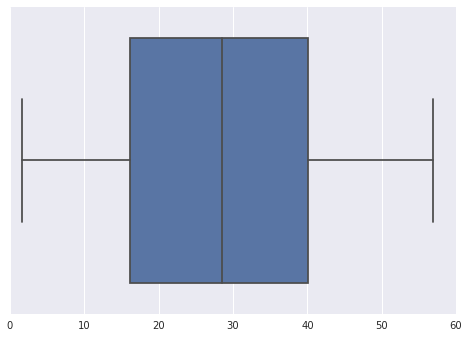

In [77]:
import seaborn as sns
sns.boxplot(ys_error)

## Collinearity

Correlation Matrix. VIF score.

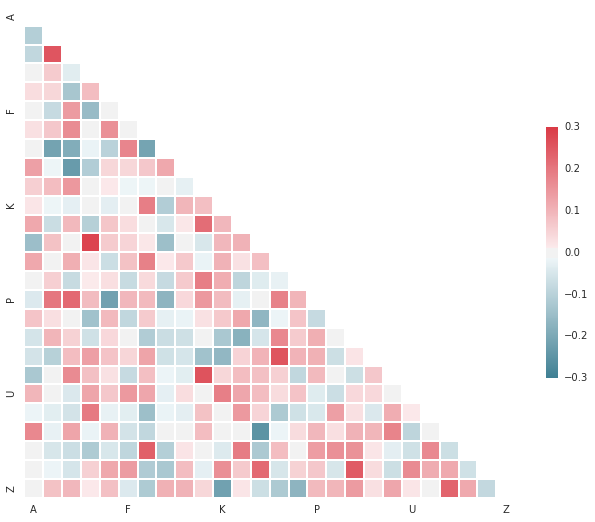

In [78]:
from string import letters
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(letters[:26]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)